# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by Drug Regimen
by_regimen=merge_table.groupby(['Drug Regimen'])

# Compute for the mean
mean_t_vol= by_regimen['Tumor Volume (mm3)'].mean()

# Compute for the median
median_t_vol= by_regimen['Tumor Volume (mm3)'].median()

# Compute for the variance
var_t_vol= by_regimen['Tumor Volume (mm3)'].var()

# Compute for the standard deviation
std_t_vol= by_regimen['Tumor Volume (mm3)'].std()

# Compute for the standard error of the mean
sem_t_vol= by_regimen['Tumor Volume (mm3)'].sem()

# Put summary in a dataframe
stat_summary_df=pd.DataFrame({"Mean Tumor Volume": mean_t_vol, 
                                 "Median Tumor Volume": median_t_vol,
                                 "Tumor Volume Variance": var_t_vol,
                                 "Tumor Volume Std. Dev.": std_t_vol,
                                 "Tumor Volume Std. Err.": sem_t_vol})
stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

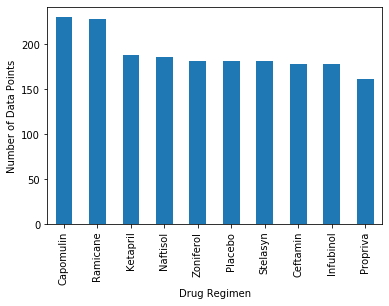

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Compute data points by regimen
data_points=by_regimen.count().sort_values('Mouse ID',ascending=False)
data_points_reg= data_points['Mouse ID']

data_points_reg.plot(kind='bar')

#Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

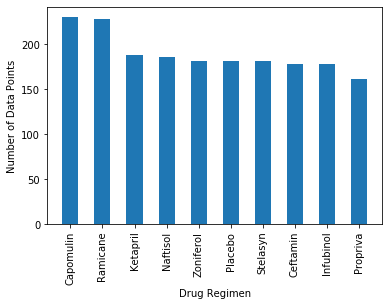

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

import numpy as np

#Assign x and y lists
x_axis = np.arange(len(data_points_reg))
users = data_points_reg.values
plt.bar(x_axis, users, align="center", width=0.5)

# Tell matplotlib where we would like to place each of our x axis headers 
tick_locations = [value for value in x_axis] 
plt.xticks(tick_locations, data_points_reg.index, rotation="vertical") 

#Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

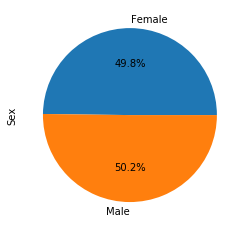

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Get gender distribution
by_gender=mouse_metadata.groupby(['Sex'])
gender_breakdown=by_gender['Sex'].count()

#Plot
gender_breakdown.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


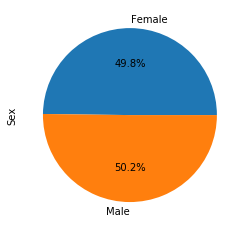

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#using same variables from the pandas plot
plt.pie(gender_breakdown,labels=gender_breakdown.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [7]:
# Calculate the final tumor volume of each mouse. 

#Get the rows with highest Timepoint value per Mouse ID, then reset the index

#final_volume=end_size_df.loc[end_size_df.groupby(['Mouse ID'])['Timepoint'].idxmax()].reset_index()
final_volume=merge_table.loc[merge_table.groupby(['Mouse ID'])['Timepoint'].idxmax()].reset_index()

#Rearrange the order of the columns to match sample output
final_volume[['Mouse ID', 'Timepoint','Tumor Volume (mm3)',
              'Metastatic Sites','Drug Regimen', 'Sex',
              'Age_months','Weight (g)']]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [48]:
#Setting index to Drug Regimen in order to use this column to filter
regimens=final_volume.set_index('Drug Regimen')

# Calculate the final tumor volume of each mouse in Capomulin treatment regime. 
capomulin_volumes=regimens.loc[['Capomulin'],['Tumor Volume (mm3)']]

quartiles = capomulin_volumes.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]['Tumor Volume (mm3)']
medianq = quartiles.loc[0.50]['Tumor Volume (mm3)']
upperq = quartiles.loc[0.75]['Tumor Volume (mm3)']
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Show results
print(f"The lower quartile of occupancy is: {round(lowerq,2)}")
print(f"The upper quartile of occupancy is: {round(upperq,2)}")
print(f"The interquartile range of occupancy is: {round(iqr,2)}")
print(f"The the median of occupancy is: {round(medianq,2)}")
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.\n")
#print(f"Capomulin potential outliers: Series([],{capomulin_volumes['Tumor Volume (mm3)']}")

The lower quartile of occupancy is: 32.38
The upper quartile of occupancy is: 40.16
The interquartile range of occupancy is: 7.78
The the median of occupancy is: 38.13
Values below 20.705 could be outliers.
Values above 51.832 could be outliers.



In [92]:
# Calculate the final tumor volume of each mouse in Ramicane treatment regime. 
ramicane_volumes=regimens.loc[['Ramicane'],['Tumor Volume (mm3)']]

quartiles = ramicane_volumes.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]['Tumor Volume (mm3)']
medianq = quartiles.loc[0.50]['Tumor Volume (mm3)']
upperq = quartiles.loc[0.75]['Tumor Volume (mm3)']
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Show results
print(f"The lower quartile of occupancy is: {round(lowerq,2)}")
print(f"The upper quartile of occupancy is: {round(upperq,2)}")
print(f"The interquartile range of occupancy is: {round(iqr,2)}")
print(f"The the median of occupancy is: {round(medianq,2)}")
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")
#print(f"Capomulin potential outliers: Series({capomulin_volumes['Tumor Volume (mm3)']})")

The lower quartile of occupancy is: 31.56
The upper quartile of occupancy is: 40.66
The interquartile range of occupancy is: 9.1
The the median of occupancy is: 36.56
Values below 17.913 could be outliers.
Values above 54.307 could be outliers.


In [49]:
# Calculate the final tumor volume of each mouse in Infubinol treatment regime. 
infubinol_volumes=regimens.loc[['Infubinol'],['Tumor Volume (mm3)']]

quartiles = infubinol_volumes.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]['Tumor Volume (mm3)']
medianq = quartiles.loc[0.50]['Tumor Volume (mm3)']
upperq = quartiles.loc[0.75]['Tumor Volume (mm3)']
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Show results
print(f"The lower quartile of occupancy is: {round(lowerq,2)}")
print(f"The upper quartile of occupancy is: {round(upperq,2)}")
print(f"The interquartile range of occupancy is: {round(iqr,2)}")
print(f"The the median of occupancy is: {round(medianq,2)}")
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")
#print(f"Capomulin potential outliers: Series({pd.Series(capomulin_volumes).dtype})")


The lower quartile of occupancy is: 54.05
The upper quartile of occupancy is: 65.53
The interquartile range of occupancy is: 11.48
The the median of occupancy is: 60.17
Values below 36.833 could be outliers.
Values above 82.741 could be outliers.


In [50]:
# Calculate the final tumor volume of each mouse in Ceftamin treatment regime. 
ceftamin_volumes=regimens.loc[['Ceftamin'],['Tumor Volume (mm3)']]

quartiles = ceftamin_volumes.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]['Tumor Volume (mm3)']
medianq = quartiles.loc[0.50]['Tumor Volume (mm3)']
upperq = quartiles.loc[0.75]['Tumor Volume (mm3)']
iqr = upperq-lowerq

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Show results
print(f"The lower quartile of occupancy is: {round(lowerq,2)}")
print(f"The upper quartile of occupancy is: {round(upperq,2)}")
print(f"The interquartile range of occupancy is: {round(iqr,2)}")
print(f"The the median of occupancy is: {round(medianq,2)}")
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")
#print(f"Capomulin potential outliers: Series({pd.Series(capomulin_volumes).dtype})")

The lower quartile of occupancy is: 48.72
The upper quartile of occupancy is: 64.3
The interquartile range of occupancy is: 15.58
The the median of occupancy is: 59.85
Values below 25.355 could be outliers.
Values above 87.666 could be outliers.


In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Create dataframe to list in order to use in boxplots
capomulin_list=capomulin_volumes['Tumor Volume (mm3)'].values.tolist()
ramicane_list=ramicane_volumes['Tumor Volume (mm3)'].values.tolist()
infubinol_list=infubinol_volumes['Tumor Volume (mm3)'].values.tolist()
ceftamin_list=ceftamin_volumes['Tumor Volume (mm3)'].values.tolist()

to_plot = [capomulin_list, ramicane_list, infubinol_list, ceftamin_list]

#Create a figure instance
fig = plt.figure(1)

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(to_plot)

# Set x-axis labels
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Set y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

NameError: name 'ramicane_volumes' is not defined

## Line and Scatter Plots

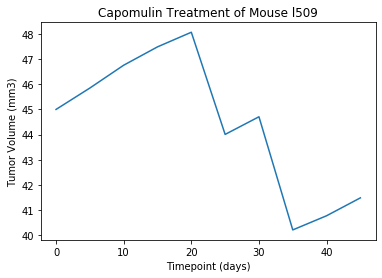

In [52]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Filter by Mouse ID = "l509" and Drug Regimen = "Capomulin"
sample_df=merge_table.loc[(merge_table['Mouse ID']=="l509") &
                          (merge_table['Drug Regimen']=="Capomulin"),['Tumor Volume (mm3)','Timepoint']]

sample_df=sample_df.sort_values('Timepoint')

#Create the line plot using filtered data 
plt.plot(sample_df['Timepoint'],sample_df['Tumor Volume (mm3)'])

# Give our graph axis labels
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

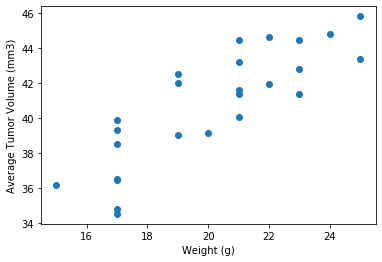

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Filter initial df by Drug Regimen = 'Capomulin'
capo_sample_df = merge_table.loc[(merge_table['Drug Regimen']=="Capomulin"),
                                ['Mouse ID','Tumor Volume (mm3)','Weight (g)']]

#Group data by Mouse ID to get individual data
indv_mouse_data = capo_sample_df.groupby(['Mouse ID'])

#average tumor volume by mouse - use as y-axis
indv_tumor_vol = indv_mouse_data['Tumor Volume (mm3)'].mean()

#weight of the mouse - use as x-axis, used mean to have 1 row of data per mouse
indv_wt = indv_mouse_data['Weight (g)'].mean()

#Add labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#create the plot
plt.scatter(indv_wt, indv_tumor_vol, marker="o")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


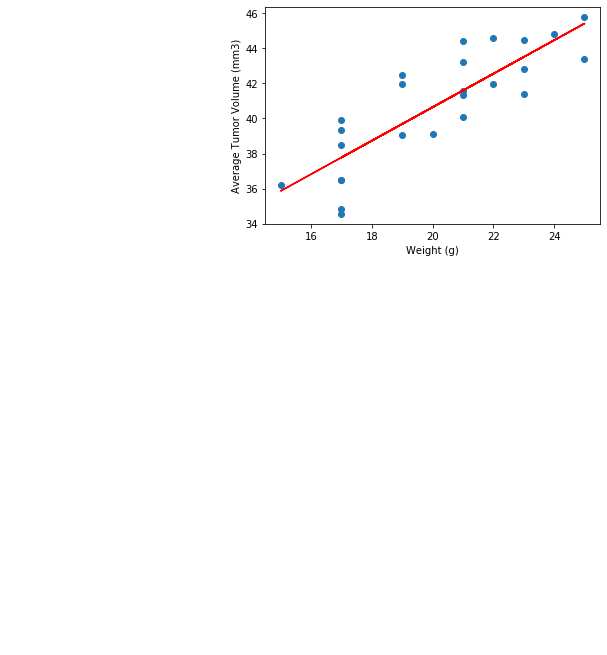

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(indv_wt,indv_tumor_vol)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(indv_wt, indv_tumor_vol)
regress_values = indv_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(indv_wt,indv_tumor_vol, marker="o")
plt.plot(indv_wt,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()